In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [28]:
# Loading the dataset 
human_activity_dataset = pd.read_csv('Human_activity_Dataset (1).csv')
print(human_activity_dataset.head()) # Shape of dataset

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

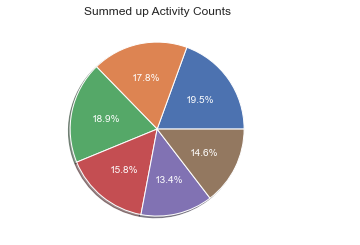

In [29]:
#Visualizing the data
human_activity_for_piechart = human_activity_dataset.groupby('Activity').sum()
plt.pie(np.array(human_activity_for_piechart['subject/Participant']), labels=['LAYING','SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'], colors=None, shadow=True,textprops=dict(color="w"),autopct='%1.1f%%')
plt.title('Summed up Activity Counts')
plt.show()


### From the above pie chart we can infer that 19.5% are using the smart phone LAYING 

In [30]:
# Checking if any of the row/column has null value
human_activity_dataset.isnull().values.any()
#Checking for numeric values
human_activity_dataset.dtypes

features = human_activity_dataset.loc[:, human_activity_dataset.columns != 'Activity']
features.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject/Participant
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24


### In the above code we can infer that, except the feature all other columns have numeric data. So we will start doing a MinMaxScaler to normalize the data

In [50]:
#MinMax Normalization - Importing the required libaries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
human_activity_dataset['Activity'] = encoder.fit_transform(human_activity_dataset.Activity.values)


X_train, X_test,y_train,y_test = train_test_split(human_activity_dataset,human_activity_dataset['Activity'],test_size=0.2,random_state=0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

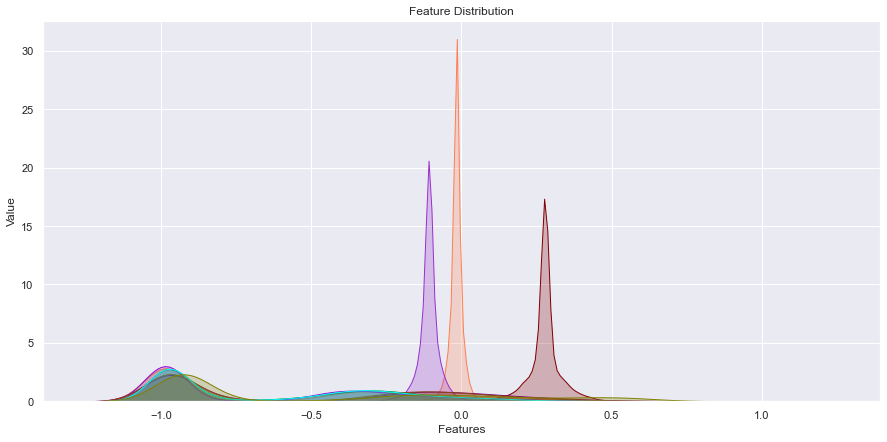

In [51]:

sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in X_train.columns[0:10]:
    index = index + 1
    fig = sns.kdeplot(X_train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)




In [52]:
#Required libraries
from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [35]:
X_train_scaled.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject/Participant,Activity
0,0.661321,0.494050,0.433611,0.677694,0.344363,0.448803,0.640045,0.322815,0.432538,0.820874,...,0.121052,0.096925,0.881618,0.932912,0.796000,0.044639,0.523097,0.489122,0.310345,0.8
1,0.626770,0.492499,0.452317,0.008821,0.012969,0.015570,0.006670,0.010798,0.014899,0.031200,...,0.211130,0.525034,0.519484,0.505056,0.625437,0.246106,0.429950,0.388382,0.379310,0.2
2,0.644780,0.492146,0.423140,0.366213,0.546154,0.290466,0.321960,0.508628,0.310651,0.611775,...,0.391287,0.429179,0.306443,0.386505,0.796357,0.102941,0.617846,0.493654,0.310345,0.6
3,0.617495,0.498770,0.497310,0.477759,0.314777,0.338687,0.437285,0.299498,0.343270,0.707891,...,0.653646,0.545665,0.153667,0.041098,0.205787,0.062154,0.571075,0.470623,0.965517,0.8
4,0.584016,0.495432,0.434760,0.296659,0.381712,0.592915,0.280528,0.360862,0.600292,0.357632,...,0.163020,0.885583,0.647091,0.380590,0.287885,0.182602,0.589572,0.631605,0.206897,0.6


In [53]:
#Training Columns
trainingColumns = X_train.drop(columns=['Activity','subject/Participant'])
testingColumns = X_test.drop(columns=['Activity','subject/Participant'])

#PCA
pca = PCA(0.95)
pca.fit(trainingColumns)
pca.fit(testingColumns)

# Transforming the dataset
train_pca = pca.transform(trainingColumns)
test_pca = pca.transform(testingColumns)

In [56]:
# logistic Regression - traning
logModel = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000,penalty='l2',C=0.01) 
logModel.fit(train_pca, X_train['Activity'])
print(human_activity_dataset['Activity'])

0        2
1        2
2        2
3        2
4        2
        ..
10294    5
10295    5
10296    5
10297    5
10298    5
Name: Activity, Length: 10299, dtype: int64


In [69]:
# Prediction for testing data
y_pred = logModel.predict(test_pca)
print(y_pred)

#Prediction for training data
y_pred_train = logModel.predict(train_pca)
print(y_pred_train)

[1 4 0 ... 1 5 5]
[4 1 3 ... 2 0 1]


In [70]:
#Confusion matrix
cm = confusion_matrix(X_test['Activity'], y_pred)
print(cm)

[[377   0   0   0   0   0]
 [  0 330  34   0   0   0]
 [  0  46 344   0   0   0]
 [  0   0   0 328   2   5]
 [  0   0   0   6 262  10]
 [  0   0   0   4   4 308]]


In [71]:
# Predicting the accuracy of training data
print(classification_report(X_train['Activity'], y_pred_train, labels=[1, 2, 3]))
print("Accuracy",accuracy_score(X_train['Activity'],y_pred_train)*100)

print('!@#$%^&^%$#@#$%^&*&^%$#')

# Predicting the accuracy of testing data data
print(classification_report(X_test['Activity'], y_pred, labels=[1, 2, 3]))
print("Accuracy",accuracy_score(X_test['Activity'],y_pred)*100)

              precision    recall  f1-score   support

           1       0.89      0.87      0.88      1413
           2       0.89      0.90      0.90      1516
           3       0.99      0.98      0.98      1387

   micro avg       0.92      0.92      0.92      4316
   macro avg       0.92      0.92      0.92      4316
weighted avg       0.92      0.92      0.92      4316

Accuracy 94.68382085204516
!@#$%^&^%$#@#$%^&*&^%$#
              precision    recall  f1-score   support

           1       0.88      0.91      0.89       364
           2       0.91      0.88      0.90       390
           3       0.97      0.98      0.97       335

   micro avg       0.92      0.92      0.92      1089
   macro avg       0.92      0.92      0.92      1089
weighted avg       0.92      0.92      0.92      1089

Accuracy 94.6116504854369
